# SVC 

In [2]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prep2 import DataPreparation
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
prep = DataPreparation()

train_db = pd.read_csv("dataset/train_radiomics_hipocamp.csv")
test_db = pd.read_csv("dataset/test_radiomics_hipocamp.csv")
control_db = pd.read_csv("dataset/train_radiomics_occipital_CONTROL.csv")

train_db = prep.prep_train(train_db)
test_db = prep.transform(test_db)
control_db = prep.transform(control_db)

In [4]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 689 entries, diagnostics_Image-original_Mean to Transition
dtypes: float64(688), object(1)
memory usage: 1.6+ MB


In [5]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 688 entries, diagnostics_Image-original_Mean to Age
dtypes: float64(688)
memory usage: 537.6 KB


In [6]:
X = train_db.drop(columns=["Transition"]) 
y = train_db["Transition"]  

In [7]:
X_train = pd.read_csv('prep2/train_X.csv')
X_test = pd.read_csv('prep2/test_X.csv')
y_train = pd.read_csv('prep2/train_y.csv')
y_test = pd.read_csv('prep2/test_y.csv')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Melhores parâmetros encontrados: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
F1 Score médio com validação cruzada: 0.34345672269430516
Matriz de Confusão:


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


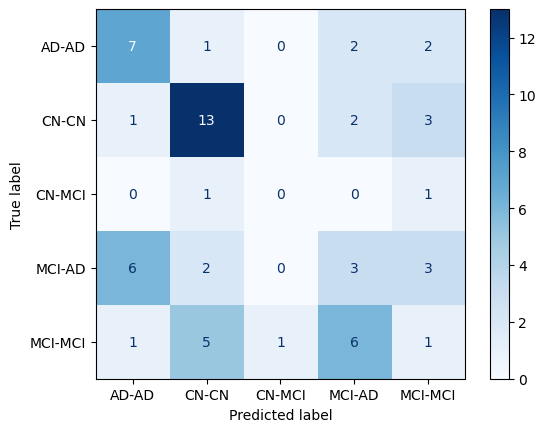


Relatório de Classificação:
              precision    recall  f1-score   support

       AD-AD       0.47      0.58      0.52        12
       CN-CN       0.59      0.68      0.63        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.23      0.21      0.22        14
     MCI-MCI       0.10      0.07      0.08        14

    accuracy                           0.39        61
   macro avg       0.28      0.31      0.29        61
weighted avg       0.35      0.39      0.37        61



In [10]:
clf = SVC(random_state=2024)

param_grid = {
    'kernel': ['rbf'], 
    'C': [10],
    'gamma': ['auto'],  
    'degree': [2],  
    'class_weight': ['balanced']  
}

cv_strategy = StratifiedKFold(n_splits=10)

# Definição do GridSearchCV
grid_search = GridSearchCV(
    estimator=clf, 
    param_grid=param_grid, 
    scoring='f1_macro',  
    cv=cv_strategy,   
    verbose=1,          
    refit=True,        
    n_jobs=-1            
)

grid_search.fit(X, y)

print("Melhores parâmetros encontrados:", grid_search.best_params_)

best_model = grid_search.best_estimator_

print("F1 Score médio com validação cruzada:", grid_search.best_score_)

best_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)

#  matriz de confusão
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


### Teste controlo

F1-Score no conjunto de controle: 0.07701529409573103


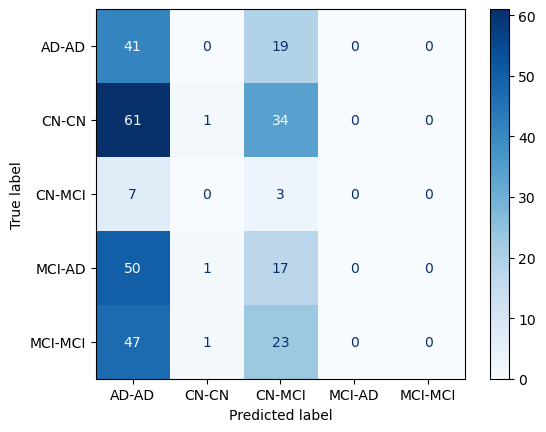


Relatório de Classificação no conjunto de controle:
              precision    recall  f1-score   support

       AD-AD       0.20      0.68      0.31        60
       CN-CN       0.33      0.01      0.02        96
      CN-MCI       0.03      0.30      0.06        10
      MCI-AD       0.00      0.00      0.00        68
     MCI-MCI       0.00      0.00      0.00        71

    accuracy                           0.15       305
   macro avg       0.11      0.20      0.08       305
weighted avg       0.15      0.15      0.07       305



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [11]:
CX = control_db.drop(columns=["Transition"]) 
Cy = control_db["Transition"]  

control_pred = best_model.predict(CX)

control_f1_score = f1_score(Cy, control_pred, average='macro')
print("F1-Score no conjunto de controle:", control_f1_score)

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(Cy, control_pred, cmap='Blues')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação no conjunto de controle:")
print(classification_report(Cy, control_pred))

### Guardar o melhor modelo do SVC

In [11]:
best_model.fit(X, y)
test_predictions = best_model.predict(test_db)

row_ids = range(1, len(test_predictions) + 1)

output_df = pd.DataFrame({
    "RowId": row_ids,
    "Result": test_predictions
})


output_df.to_csv("resultados/svc2.csv", index=False)